# Marketing campaigns of a Portuguese banking institution Dataset Analysis Report Using K-Means Clustering


### An example of unsupervised learning - clustering customer data

## Goal:

Finding reasonable clusters of customers for marketing segmentation and study

----

# The Data

LINK: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   This dataset is publicly available for research. The details are described in [Moro et al., 2011]. 


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October 2011. EUROSIS.

      Available at: [pdf] http://hdl.handle.net/1822/14838
                    [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     For more information, read [Moro et al., 2011].

    # bank client data:
    1 - age (numeric)
    2 - job: type of job (categorical: 'admin.', 'blue-collar','entrepreneur',' housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Imports

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [34]:
df = pd.read_csv('bank-full.csv')

In [35]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [36]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Continuous Feature Analysis

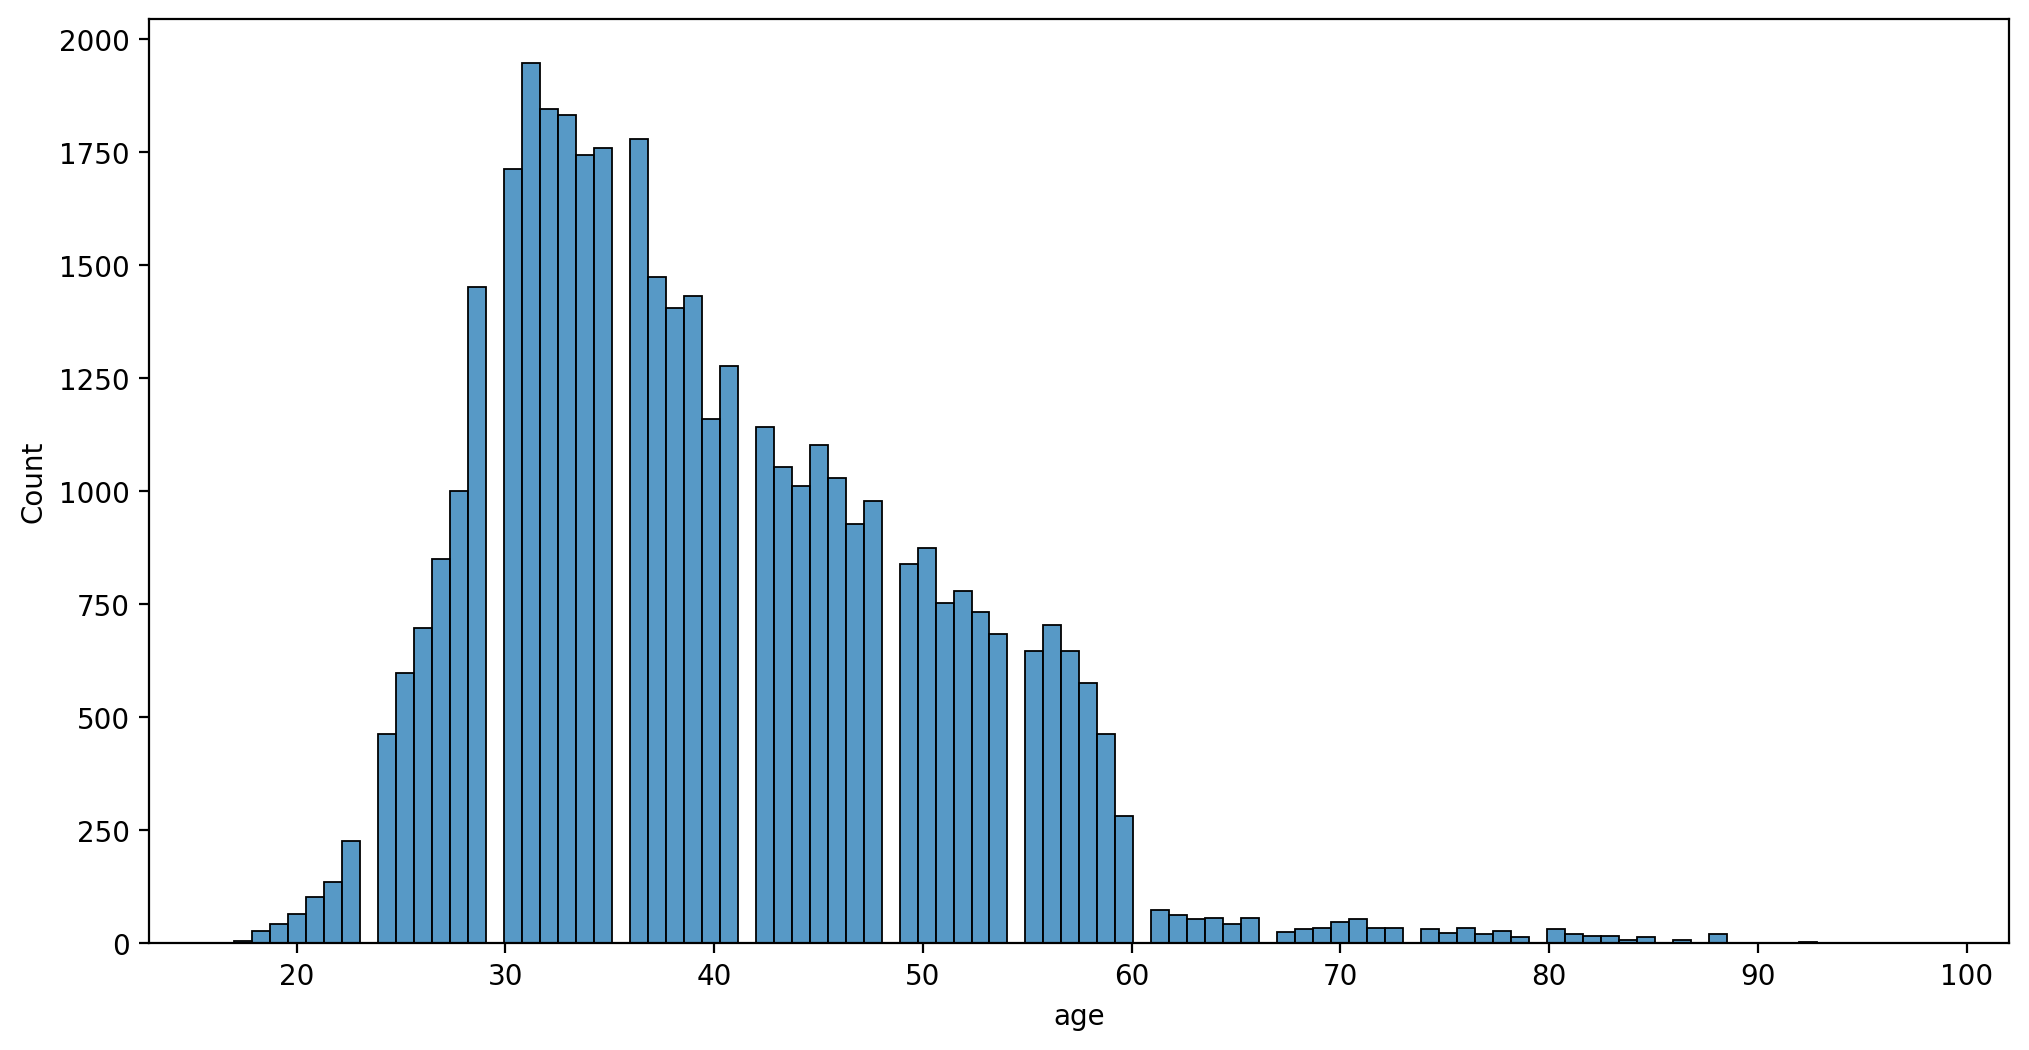

In [38]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='age');

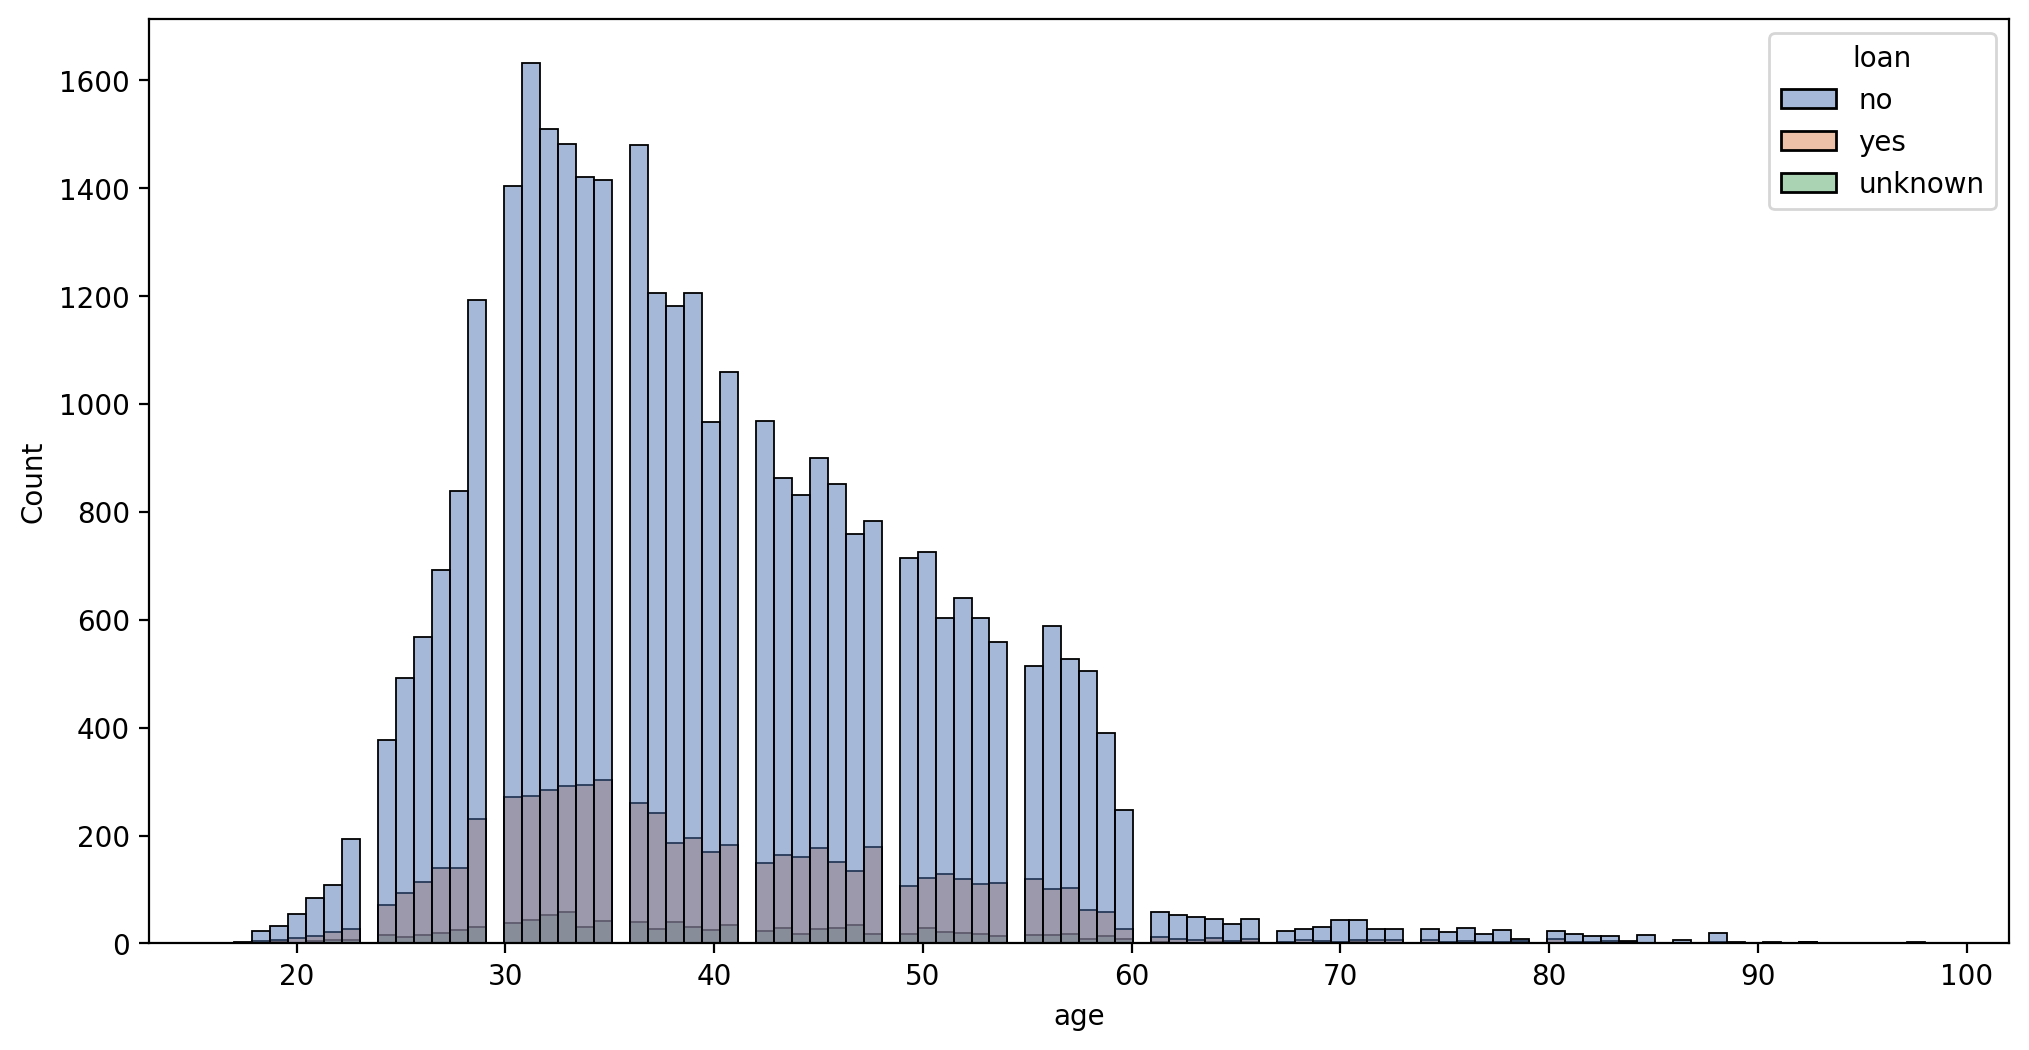

In [39]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='age', hue='loan', palette='deep');

**pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

<Axes: xlabel='pdays', ylabel='Count'>

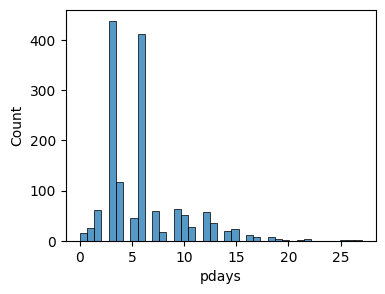

In [40]:
plt.figure(figsize=(4,3))
sns.histplot(data= df[df['pdays']!=999], x='pdays')

**Contact duration - contact with customer made, how long did call last?**

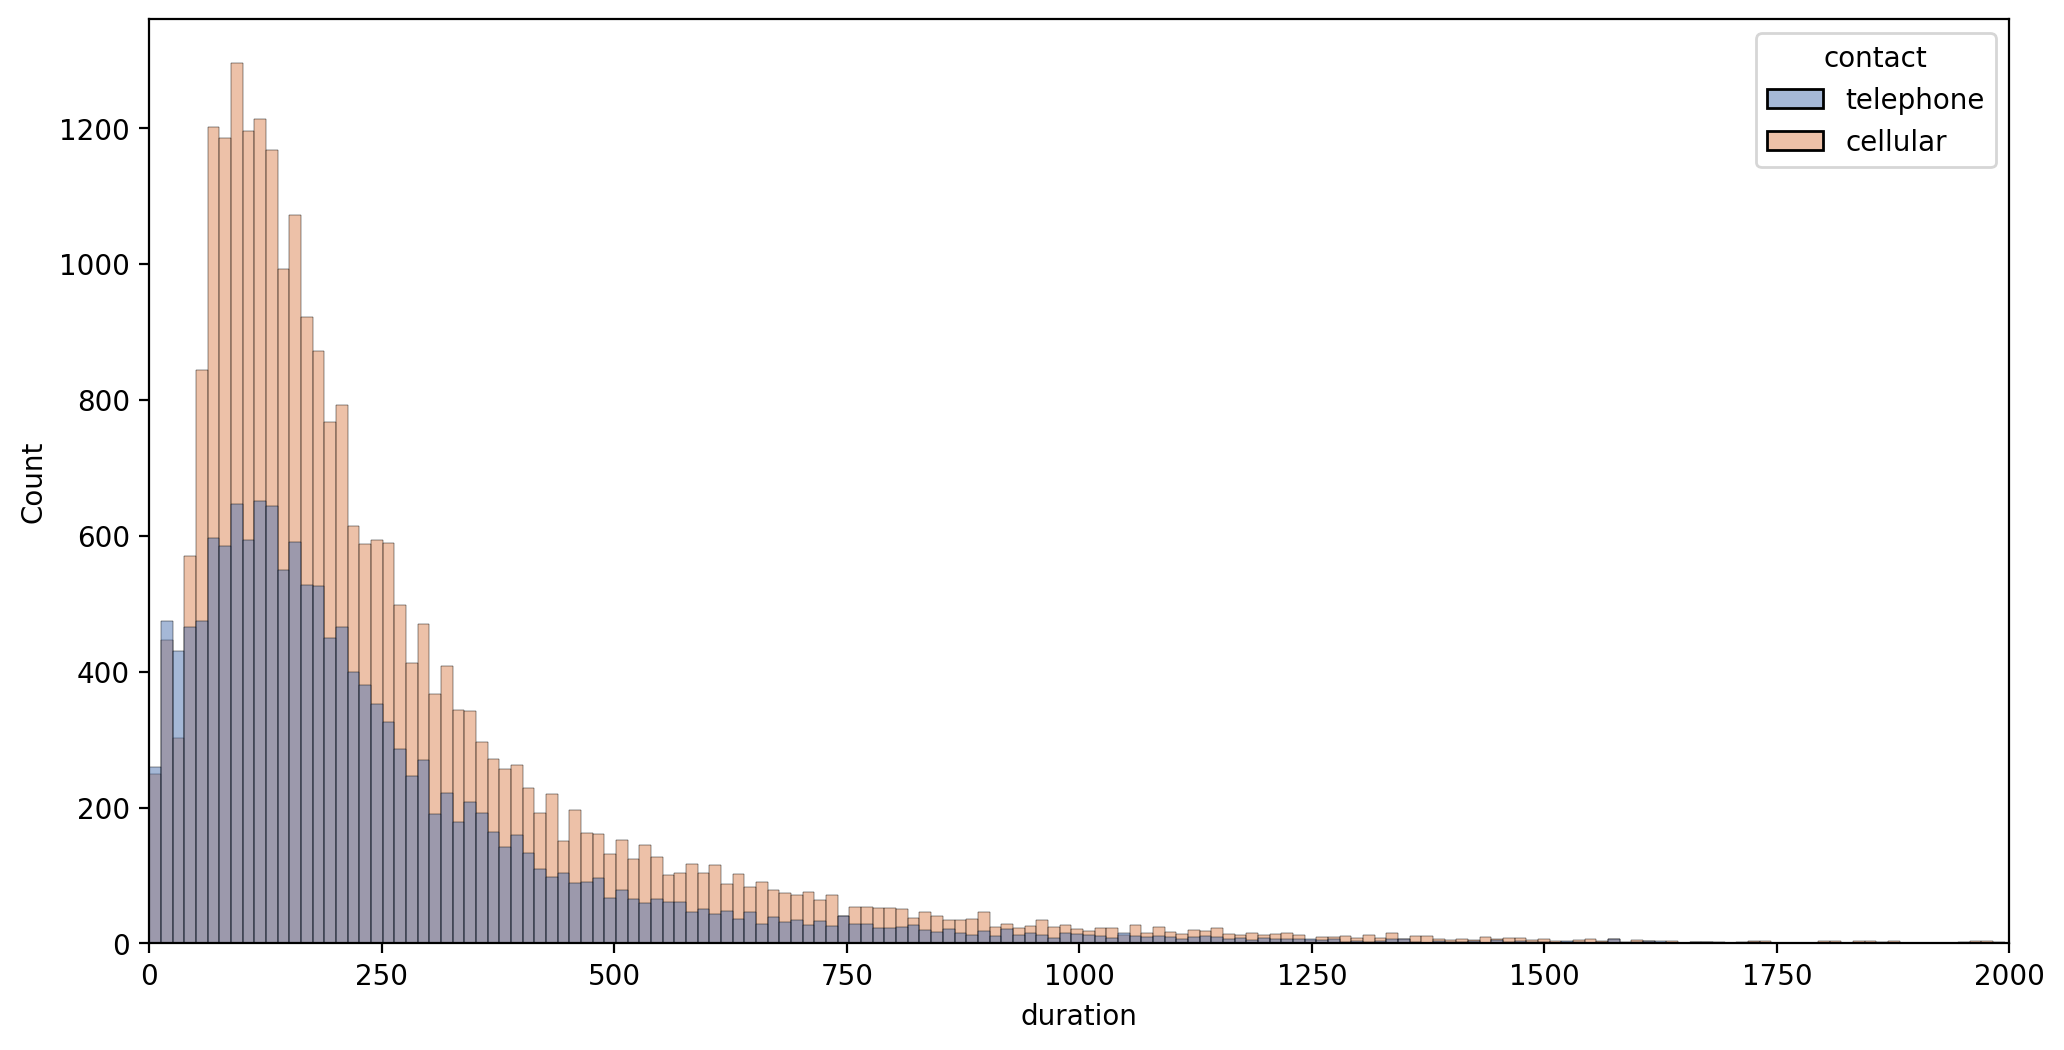

In [41]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='duration', hue='contact', palette='deep')
plt.xlim(0,2000);

* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"

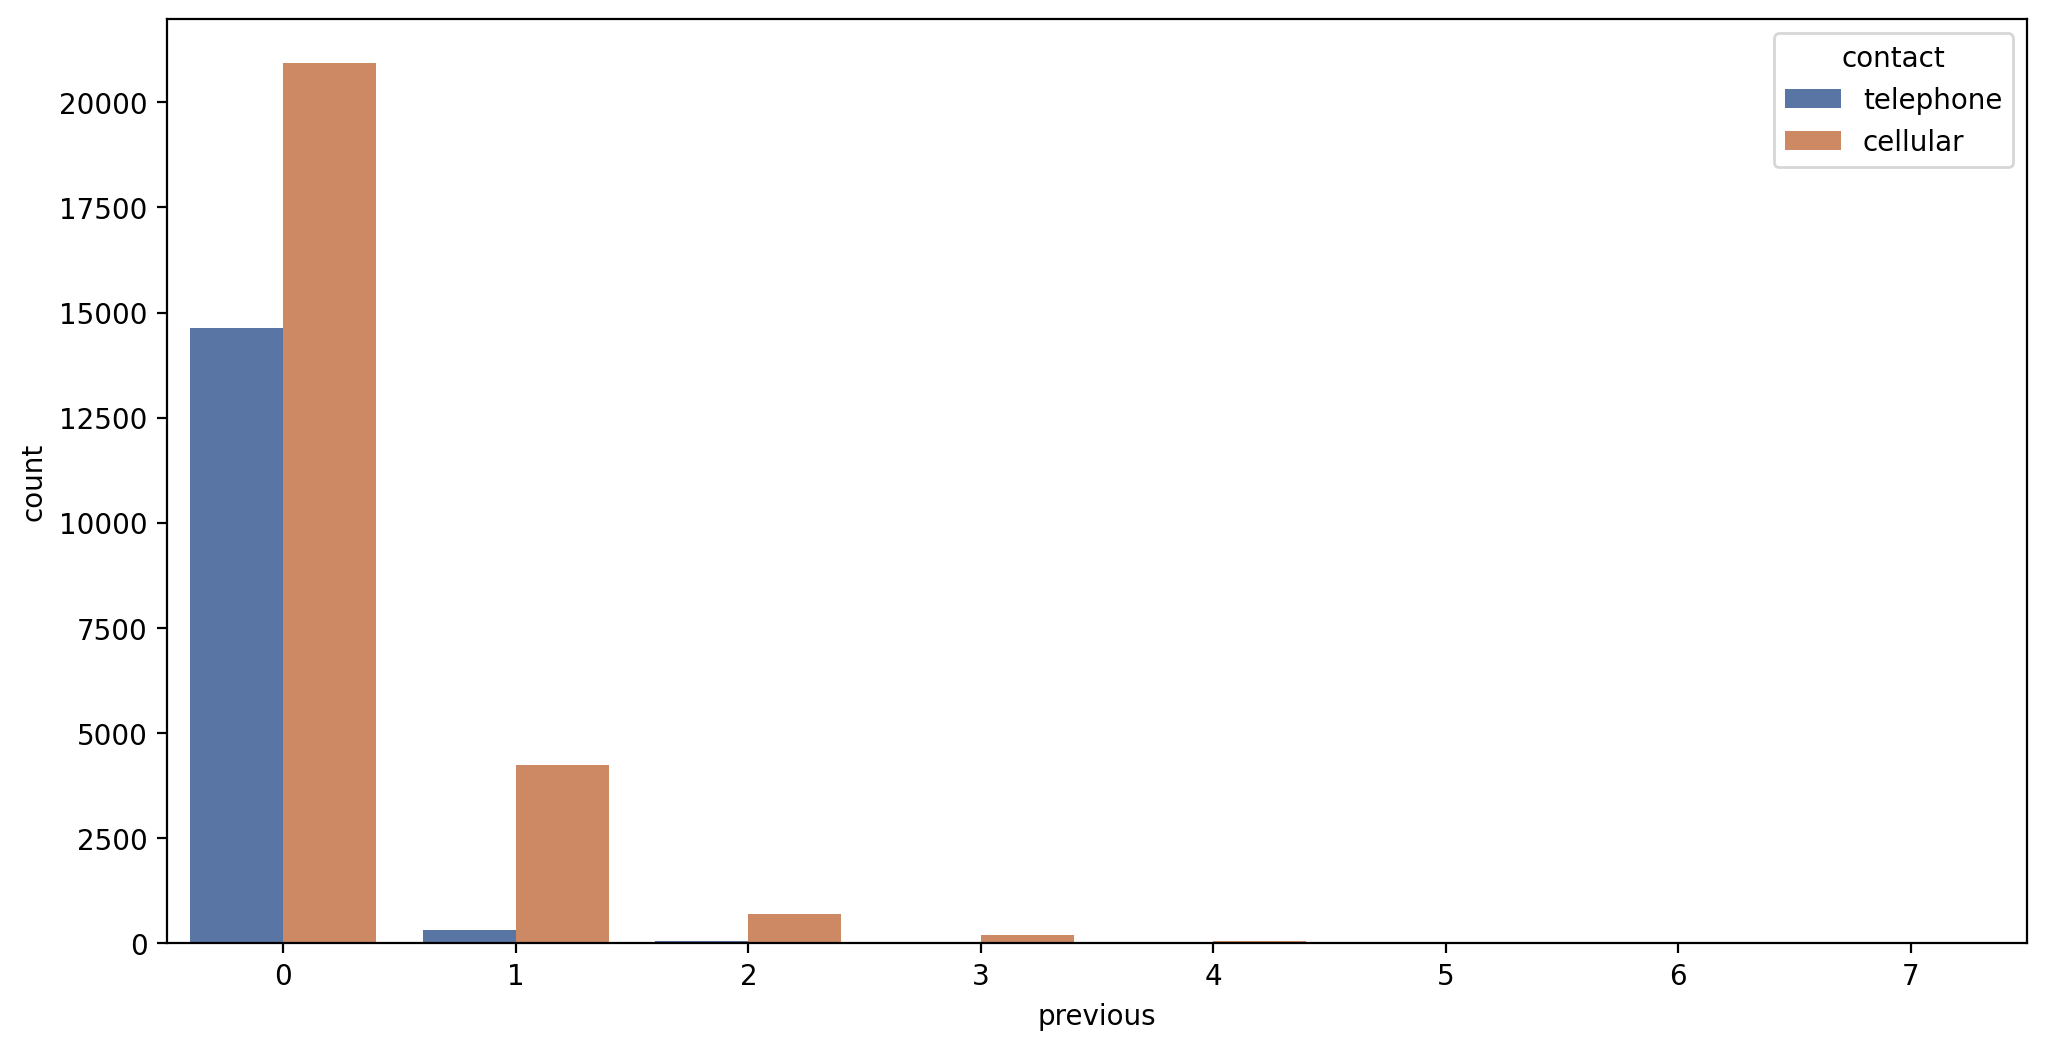

In [42]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='previous', hue='contact', palette='deep');

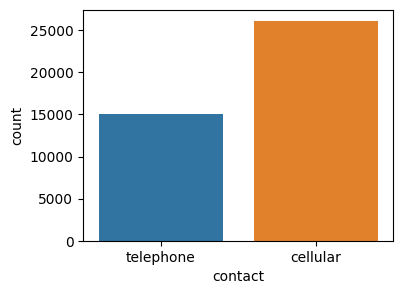

In [43]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='contact', hue='contact');

In [44]:
df['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [45]:
df['previous'].value_counts().sum() - 35563

5625

In [46]:
df[df['previous']!=0]['previous'].value_counts().sum()

5625

## Categorical Features

In [47]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


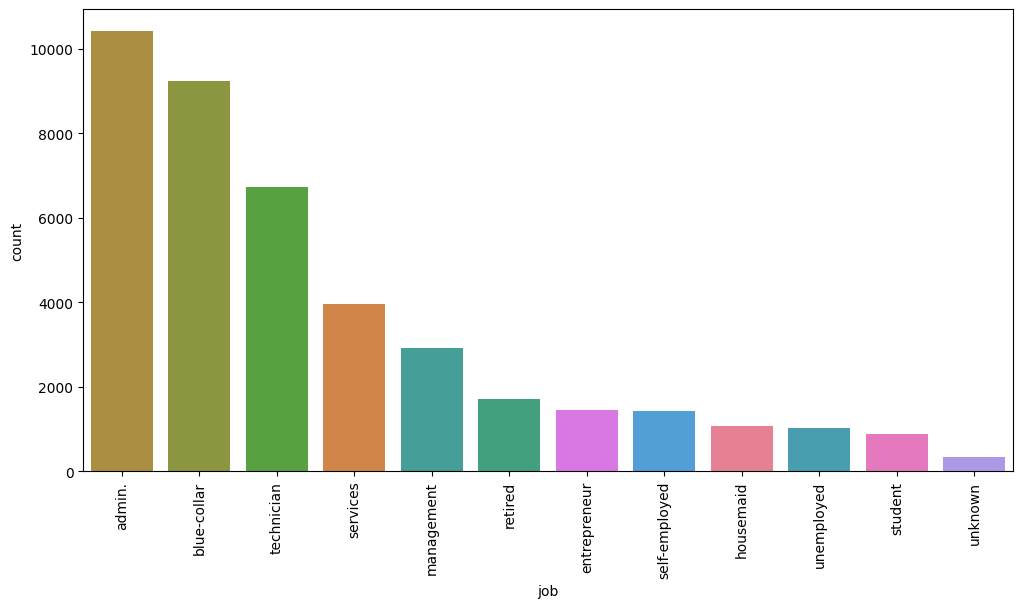

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index, hue='job')
plt.xticks(rotation=90);

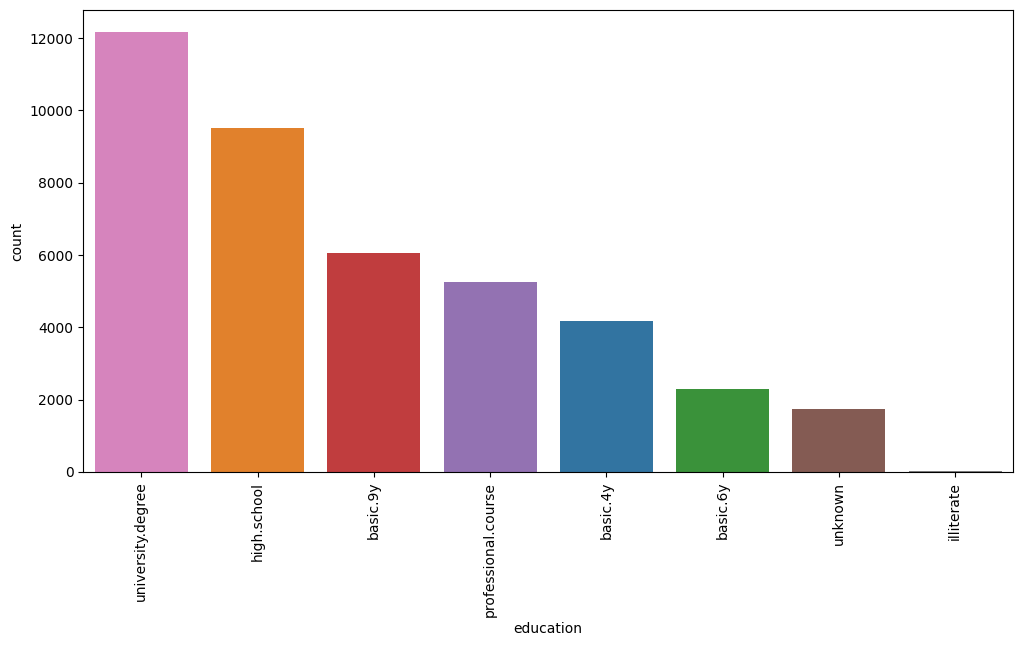

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, hue='education')
plt.xticks(rotation=90);

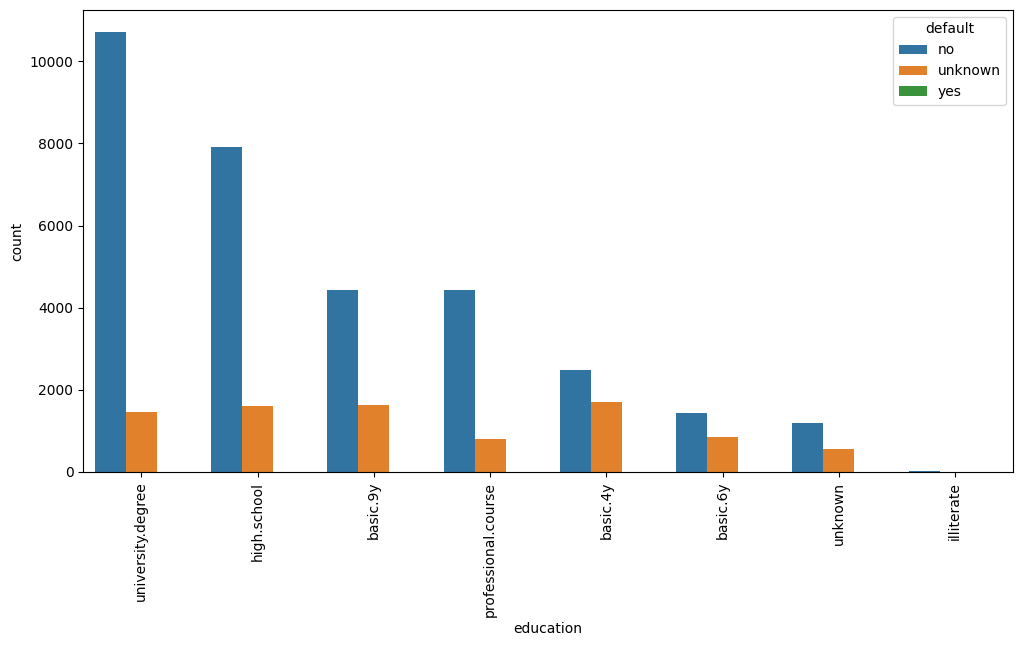

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90);

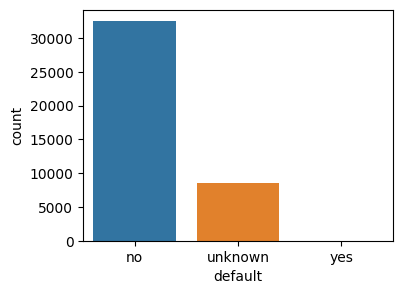

In [51]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='default', hue='default');

In [52]:
# sns.pairplot(data=df)

# Clustering

### Data Preparation

We need to transform categorical features into numeric ones where it makes sense to do so, as well as scaling the data due to distance being a key factor in clustering.

In [54]:
X = pd.get_dummies(df)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
sc = StandardScaler()

In [58]:
X_scaled = sc.fit_transform(X)

### Creating and Fitting a KMeans Model


* fit(X[, y, sample_weight])
    * Compute k-means clustering.

* fit_predict(X[, y, sample_weight])
    * Compute cluster centers and predict cluster index for each sample.

* fit_transform(X[, y, sample_weight])
    * Compute clustering and transform X to cluster-distance space.

* predict(X[, sample_weight])
    * Predict the closest cluster each sample in X belongs to.

In [59]:
from sklearn.cluster import KMeans

In [60]:
model = KMeans(n_clusters=2)

In [65]:
labels = model.fit_predict(X_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [66]:
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [77]:
len(X_scaled)

41188

In [78]:
len(labels)

41188

In [67]:
X['Cluster'] = labels

In [71]:
X.corr()['Cluster'].sort_values()

previous           -0.478467
poutcome_failure   -0.464295
contact_cellular   -0.410476
month_apr          -0.357923
subscribed_yes     -0.294610
                      ...   
cons.price.idx      0.679372
nr.employed         0.886155
emp.var.rate        0.932612
euribor3m           0.959297
Cluster             1.000000
Name: Cluster, Length: 66, dtype: float64

In [73]:
X.corr()['Cluster'].iloc[:-1].sort_values()

previous               -0.478467
poutcome_failure       -0.464295
contact_cellular       -0.410476
month_apr              -0.357923
subscribed_yes         -0.294610
                          ...   
poutcome_nonexistent    0.544377
cons.price.idx          0.679372
nr.employed             0.886155
emp.var.rate            0.932612
euribor3m               0.959297
Name: Cluster, Length: 65, dtype: float64

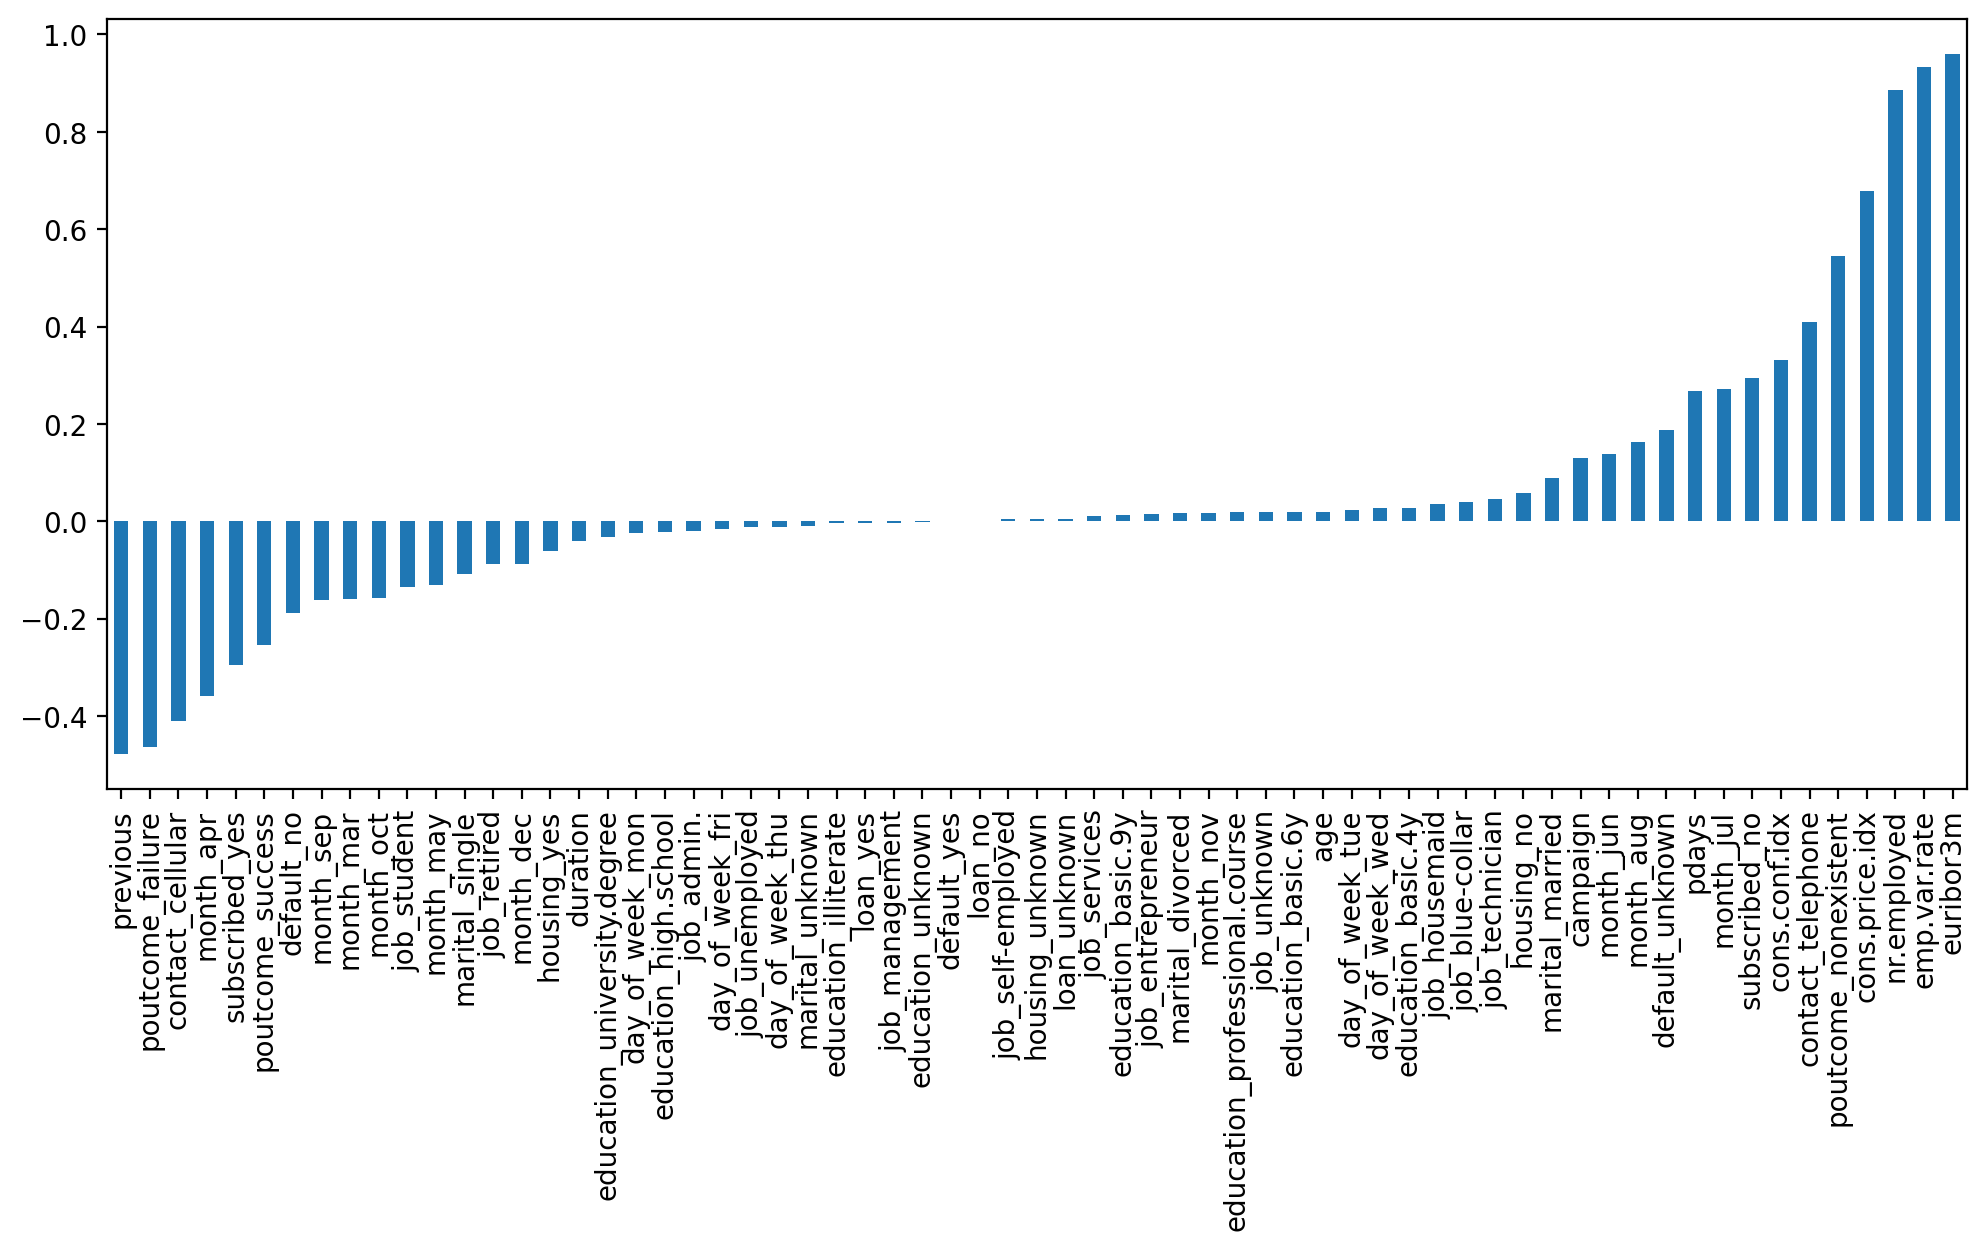

In [76]:
plt.figure(figsize=(12,5), dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar');

# Choosing K Value

In [80]:
ssd = [] # Sum of Squared Distances

for k in range(2, 10):
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

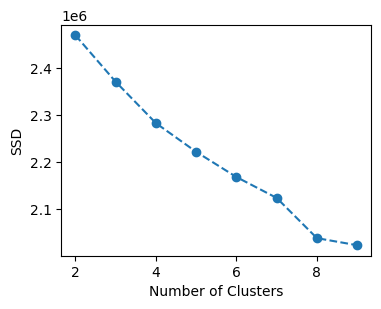

In [84]:
plt.figure(figsize=(4,3))
plt.plot(range(2,10), ssd, 'o--')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD');

In [85]:
ssd

[2469792.3673020806,
 2370787.1549491333,
 2282647.9145101337,
 2221549.6014232878,
 2167903.3620331245,
 2123416.273233009,
 2037733.5243648554,
 2022702.3252704064]

In [86]:
pd.Series(ssd)

0    2.469792e+06
1    2.370787e+06
2    2.282648e+06
3    2.221550e+06
4    2.167903e+06
5    2.123416e+06
6    2.037734e+06
7    2.022702e+06
dtype: float64

In [88]:
# (ssd+) - (ssd-) 
pd.Series(ssd).diff()

0             NaN
1   -99005.212353
2   -88139.240439
3   -61098.313087
4   -53646.239390
5   -44487.088800
6   -85682.748868
7   -15031.199094
dtype: float64

<Axes: >

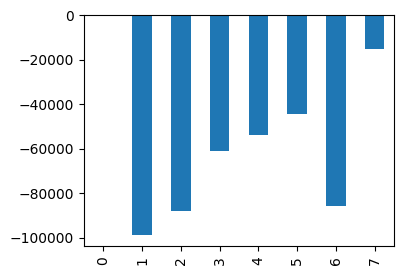

In [90]:
plt.figure(figsize=(4,3))
pd.Series(ssd).diff().plot(kind='bar')

#### Best K: 5